In [1]:
#working from this walk through
#https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177816-understand-how-k-means-clustering-works

In [2]:
#Starting here:
#https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177851-carry-out-a-k-means-clustering

In [3]:
#import standard libraries
import pandas as pd
import numpy as np

#import the kmeans algorithm
from sklearn.cluster import KMeans

#import functions from the tutorial
from functions import *

In [4]:
#load the cleaned & scaled data
happy_data = pd.read_csv("Resources/Data/scaled_data.csv")
happy_data = happy_data.drop(columns=['Unnamed: 0'])
#happy_data.head()
col = happy_data.columns
print(len(col))
happy_data.head()

29


,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Happiness (Dystopia),Beer_Servings,Spirit_Servings,...,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,GDP.1,Population,thinness1-19years,thinness5-9years,HDI,Schooling
0,1.000000,0.929138,0.979132,0.936153,0.973512,-0.106092,0.208901,1.0,0.699468,0.356568,...,0.0,0.979798,0.979798,0.010753,0.075068,0.021225,0.033708,0.029304,0.941983,0.833333
1,0.979113,0.940905,0.980836,0.942685,0.975842,0.118077,0.180090,1.0,0.595745,0.217158,...,0.0,0.939394,0.939394,0.010753,0.093974,0.022015,0.041199,0.032967,0.973629,0.941176
2,0.968138,0.958889,0.967350,0.964818,0.944962,0.188903,0.324640,1.0,0.492021,0.268097,...,0.0,0.979798,0.979798,0.010753,0.158959,0.032082,0.014981,0.010989,0.989451,0.784314
3,0.961043,0.940779,1.000000,0.950464,0.973224,0.440450,0.760711,1.0,0.619681,0.163539,...,0.0,0.929293,0.929293,0.010753,0.101397,0.000131,0.037453,0.032967,0.969409,0.931373
4,0.958930,0.968310,0.977240,0.953078,0.980259,0.239952,0.281341,1.0,0.449468,0.190349,...,0.0,0.959596,0.959596,0.010753,0.131824,0.002010,0.029963,0.025641,1.000000,0.867647


In [5]:
#Skipped the steps scaling & cleaning the data as we already performed this
#Using 3 clusters based on the elbow method done previously

#Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=3, n_init=10)

#Fit the data to the model
kmeans.fit(happy_data)

#Determine which clusters each data point belongs to:
clusters = kmeans.predict(happy_data)
print(clusters.shape)

(155,)


In [6]:
#Let's add a new column, cluster number to the original data so we can see what countries sit in what cluster:

#Add cluster number to the original data
happy_clustered = pd.DataFrame(happy_data, columns=happy_data.columns, index = happy_data.index)
happy_clustered['cluster'] = clusters
print(happy_clustered.shape)
hcol = happy_clustered.columns
print(len(hcol))

happy_clustered.head()

(155, 30)
30


,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Happiness (Dystopia),Beer_Servings,Spirit_Servings,...,Polio,Diphtheria,HIV/AIDS,GDP.1,Population,thinness1-19years,thinness5-9years,HDI,Schooling,cluster
0,1.000000,0.929138,0.979132,0.936153,0.973512,-0.106092,0.208901,1.0,0.699468,0.356568,...,0.979798,0.979798,0.010753,0.075068,0.021225,0.033708,0.029304,0.941983,0.833333,1
1,0.979113,0.940905,0.980836,0.942685,0.975842,0.118077,0.180090,1.0,0.595745,0.217158,...,0.939394,0.939394,0.010753,0.093974,0.022015,0.041199,0.032967,0.973629,0.941176,1
2,0.968138,0.958889,0.967350,0.964818,0.944962,0.188903,0.324640,1.0,0.492021,0.268097,...,0.979798,0.979798,0.010753,0.158959,0.032082,0.014981,0.010989,0.989451,0.784314,1
3,0.961043,0.940779,1.000000,0.950464,0.973224,0.440450,0.760711,1.0,0.619681,0.163539,...,0.929293,0.929293,0.010753,0.101397,0.000131,0.037453,0.032967,0.969409,0.931373,1
4,0.958930,0.968310,0.977240,0.953078,0.980259,0.239952,0.281341,1.0,0.449468,0.190349,...,0.959596,0.959596,0.010753,0.131824,0.002010,0.029963,0.025641,1.000000,0.867647,1


In [7]:
# Moving to next step of the tutorial, "Analyze the Results of a K-means Clustering"
#https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177861-analyze-the-results-of-a-k-means-clustering

In [8]:
from sklearn.decomposition import PCA

#Create a PCA model to reduce our data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(happy_data)

#Transfer the scaled data to the new PCA space
happy_reduced = pca.transform(happy_data)
print(happy_reduced.shape)

(155, 2)


In [9]:
#Convert to a data frame
happy_reduced_df = pd.DataFrame(happy_reduced, index = happy_data.index, columns=['PC1', 'PC2'])
happy_reduced_df['cluster'] = clusters
happy_reduced_df.head()

,PC1,PC2,cluster
0,-0.259885,0.838148,1
1,-0.247667,0.960908,1
2,-0.243105,0.894951,1
3,-0.181734,0.559318,1
4,-0.203346,0.622696,1


In [10]:
# This works if you take away the pca portion of it, but I don't know what that means
# centres_reduced = pca.transform(kmeans.cluster_centers_)
# print(kmeans.cluster_centers_)

In [11]:
# display_factorial_planes(happy_data, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
# plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
#            marker='x', s=169, linewidth=3,
#            color='r', zorder=10)

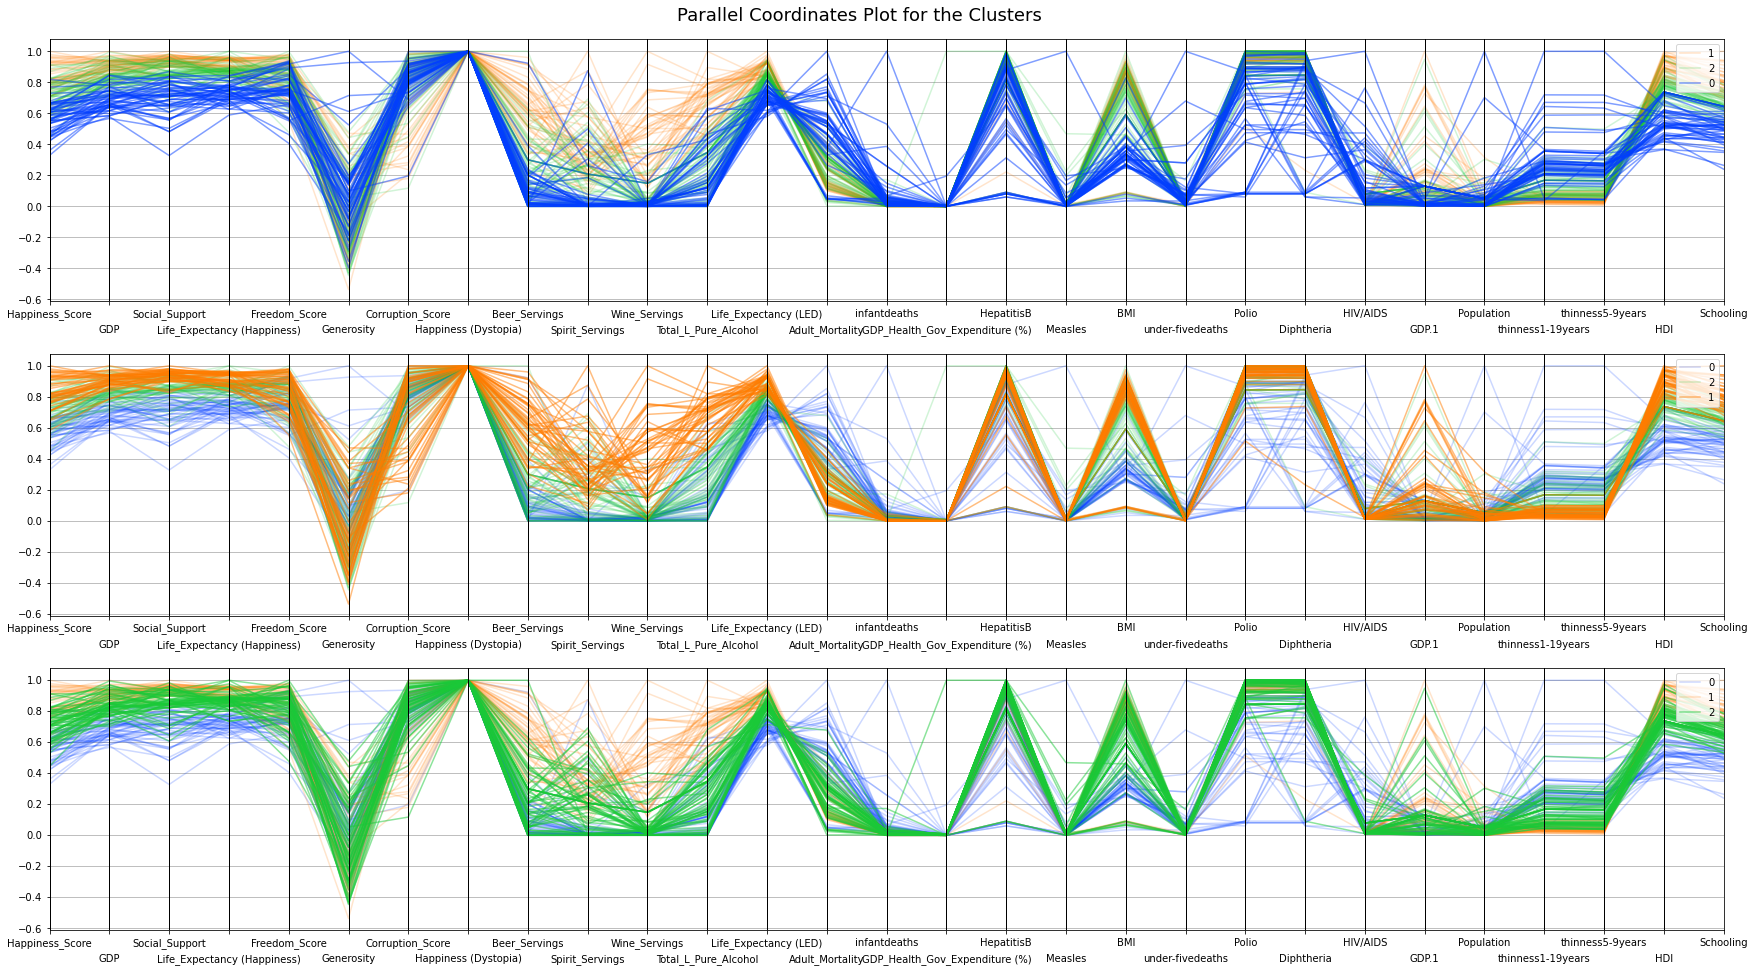

In [12]:
#display parallel coordinates plots, one for each cluster
display_parallel_coordinates(happy_clustered, 3)

In [13]:
#create a data frame containing our centroids
# centroids = pd.DataFrame(kmeans.cluster_centers_, columns=happy_data.columns)
# centroids['cluster'] = centroids.index

# display_parallel_coordinates_centroids(centroids,10)